<font size=4 color='cornflowerblue'>

# Tarea 6

### Implementar una red neuronal de convolución usando el conjunto de datos mnist.



In [51]:
import numpy as np
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import SGD
import keras.backend as K
from keras.layers import BatchNormalization                       
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.models import Sequential
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import gzip
import pickle

np.random.seed(1)
%matplotlib inline

<font size = 5 color="cornflowerblue">

Parte I: **Análisis de datos**

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 1

<font size=4>

Importa y carga la base de datos mnist de Keras:

<font size = 4>

*El conjunto de datos mnist lo pueden obtener directamente de Keras: [mnist Keras](https://keras.io/examples/vision/mnist_convnet/)*

In [13]:
def load_data():
    f = gzip.open('mnist.pkl.gz', 'rb')
    train_data, val_data, test_data = pickle.load(f, encoding="latin1")
    f.close()
    return (train_data, val_data, test_data)

In [14]:
train_data, val_data, test_data = load_data()

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 2

<font size=4>

¿De qué tipo son los conjuntos que obtuviste?

In [15]:
print("The type of train_data: ", type(train_data), "with length: ", len(train_data) )
print("The type of val_data: ", type(val_data), "with length: ", len(val_data) )
print("The type of test_data: ", type(test_data), "with length: ", len(test_data) )

The type of train_data:  <class 'tuple'> with length:  2
The type of val_data:  <class 'tuple'> with length:  2
The type of test_data:  <class 'tuple'> with length:  2


<font size = 4 color="blue">
Tuplas con dos entradas

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 3

<font size=4>

¿Qué dimensión tienen los conjuntos que obtuviste?

In [23]:
print("Shape of the first element of the train_data tuple: ", train_data[0].shape)
print("Shape of the second element of the train_data tuple: ", train_data[1].shape)
print("Shape of the first element of the val_data tuple: ", val_data[0].shape)
print("Shape of the second element of the val_data tuple: ", val_data[1].shape)
print("Shape of the first element of the test_data tuple: ", test_data[0].shape)
print("Shape of the second element of the test_data tuple: ", test_data[1].shape)

Shape of the first element of the train_data tuple:  (50000, 784)
Shape of the second element of the train_data tuple:  (50000,)
Shape of the first element of the val_data tuple:  (10000, 784)
Shape of the second element of the val_data tuple:  (10000,)
Shape of the first element of the test_data tuple:  (10000, 784)
Shape of the second element of the test_data tuple:  (10000,)


<font size = 4 color="blue">

La primera entrada corresponde a los 784 razgos de las 50000 imágenes:

$train\_data[0][i][j] = $ el j-ésimo razgo de la i-ésima imágen.    
 
La segunda a sus correspondientes etiquetas, una por cada una de las imágenes:

$train\_data[1][i] = $ la etiqueta de la i-ésima imágen.

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 4

<font size=4>

¿Cómo se ve una muestra de entrenamiento?, Responde a esta pregunta mostrando un ejemplo, ¿qué representa cada valor en la muestra?

In [27]:
print("features 150 to 199 of the 20th training sample \n \n", train_data[0][20][100:300])
print("\n y value of the 20th training sample =",train_data[1][20])

features 150 to 199 of the 20th training sample 
 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.1484375
 0.7421875  0.09765625 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05078125 0.09765625 0.0390625  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.4375     0.984375   0.48828125
 0.015625   0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.515625
 0.984375   0.44140625 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.23828125 0.984375   0.984375   0.140625   0.
 0.         0.         0.         0.      

<font size = 4 color="blue">
Cada razgo representa una tonalidad de la imágen (en blanco y negro) normalizada a 1.
Cada valor "y" representa el valor del dígito escrito.

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 5

<font size=4>

¿Las muestras estan normalizadas?, (cómo puedes saber esto) si no estan normalizadas, normalizalas. 

*recuerda que en el caso de imágenes la normalizacion es dividir cada pixel por la intensidad máxima (255)*

In [32]:
print("Máximo valor de los razgos = "+str(train_data[0].max()))
print("Mínimo valor de los razgos = "+str(train_data[0].min()))

Máximo valor de los razgos = 0.99609375
Mínimo valor de los razgos = 0.0


<font size = 4 color="blue">
La muestra si está normalizada entre 0 y 1.

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 6

<font size=4>


En un ejercicio anterior se obtuvo la muestra en forma de arreglo, ahora muestra la imagen y su correspondiente etiqueta (usa un ejemplo del conjunto de entrenamiento).

0 is the digit corresponding to the sample 4321

 This is its image


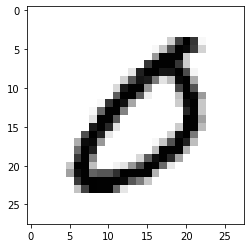

In [37]:
index = 4321

plt.imshow(train_data[0][index].reshape((28, 28)),cmap='binary')

print(train_data[1][index], "is the digit corresponding to the sample", index)
print("\n This is its image")


<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 7

<font size=4>

Dada una muestra de entrada (input) ¿de qué forma se indica la etiqueta (output)?

<font size = 4 color="blue">
Se representa con un número "y" que denota el valor del número escrito.


<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 8

<font size=4>

Convierte el output en representación one-hot.


Hint: Puedes usar la función de Keras [to_categorical](https://keras.io/api/utils/python_utils/#to_categorical-function)

Observa cómo cambian sus dimensiones (muéstralo usando shape).

In [38]:
x_train = train_data[0]   # input (features) in the training data set
y_train = train_data[1]   # target (the digit) in the training data set

x_val = val_data[0]   # input (features) in the validation data set
y_val = val_data[1]   # target (the digit) in the validation data set

x_test = test_data[0]     # input (features) in the testing data set
y_test = test_data[1]     # target (the digit) in the testing data set

In [39]:
train_y = np.eye(10)[y_train]

val_y = np.eye(10)[y_val]

test_y = np.eye(10)[y_test]

In [45]:
print(y_train.shape)
print(train_y.shape)
#Cambia de escalares a vectores

(50000,)
(50000, 10)


In [40]:
print("Y: Digit representation for the first training sample \n", y_train[0])
print("Y: One-hot representation for the first training sample \n",train_y[0])

Y: Digit representation for the first training sample 
 5
Y: One-hot representation for the first training sample 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 9

<font size=4>

Hasta aquí debes tener cuatro conjuntos de datos: los correspondientes a las entradas y las salidas de la red neuronal que se van a usar para el entrenamiento de la red (train_x y train_y) y los correspondientes a las entradas y salidas de la red neuronal que se van a usar para la prueba (test_x, test_y).

Muestra las dimensiones de estos cuatro conjuntos.

In [78]:
#Cambiamos el shape de las imágenes, y especificamos que solo hay un canal (blanco y negro). A queras no le gusta que no lo especifiquemos
train_x = x_train.reshape(50000, 28, 28, 1)
val_x  = x_val.reshape(10000, 28, 28, 1)
test_x = x_test.reshape(10000, 28, 28, 1)

In [79]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(50000, 28, 28, 1)
(50000, 10)
(10000, 28, 28, 1)
(10000, 10)


<font size = 5 color="cornflowerblue">

Parte II: **Implemetación de la red neuronal**

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 10

<font size=4>

Implementa una red neuronal de convolución dentro de una función (como lo hemos visto en clase). Puedes guiarte con el notebook de la clase 10 o de [mnist Keras](https://keras.io/examples/vision/mnist_convnet/) *(no uses la misma arquitectura que se da)*.

Cuida que la función que implementes sea flexible, es decir, que si cambiamos las dimensiones de las entradas no se tenga que modificar la función directamente, más bien indicarlo como un argumento de la función. 

In [50]:
help(Conv2D)

Help on class Conv2D in module keras.layers.convolutional:

class Conv2D(_Conv)
 |  Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers, does not include the batch axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
 

In [52]:
help(MaxPooling2D)

Help on class MaxPooling2D in module keras.layers.pooling:

class MaxPooling2D(_Pooling2D)
 |  MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None, **kwargs)
 |  
 |  Max pooling operation for spatial data.
 |  
 |  # Arguments
 |      pool_size: integer or tuple of 2 integers,
 |          factors by which to downscale (vertical, horizontal).
 |          (2, 2) will halve the input in both spatial dimension.
 |          If only one integer is specified, the same window length
 |          will be used for both dimensions.
 |      strides: Integer, tuple of 2 integers, or None.
 |          Strides values.
 |          If None, it will default to `pool_size`.
 |      padding: One of `"valid"` or `"same"` (case-insensitive).
 |      data_format: A string,
 |          one of `channels_last` (default) or `channels_first`.
 |          The ordering of the dimensions in the inputs.
 |          `channels_last` corresponds to inputs with shape
 |          `(batch, height

In [102]:
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    #Padding=valid es p=0 (aplicable, ya que los números están centrados) Hace que la dim de salida sea (n-f+1)/s
    model.add(Conv2D(filters = 28, kernel_size = 3, strides = 1, padding='valid', input_shape=input_shape)) #(28-3+1)/1 = 26
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
       
    #Aqui si le agregamos padding tal que la dim de entrada sea la de salida
    model.add(Conv2D(filters = 15, kernel_size = 5, strides = 3, padding='same',kernel_initializer='he_uniform',bias_initializer='zeros')) #26
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
        
    #model.add(MaxPooling2D())
    model.add(AveragePooling2D()) #Filtros de 2x2 (reduce por la mitad a 13)
    
    model.add(Conv2D(filters = 20, kernel_size = 2, padding = 'same', kernel_initializer = 'he_uniform',bias_initializer='zeros')) #13
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
               
    model.add(Conv2D(filters = 20, kernel_size = 2, padding = 'same', kernel_initializer = 'he_uniform',bias_initializer='zeros')) #13
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
    
    model.add(MaxPooling2D())
    
    model.add(Flatten()) #13x13x20 = 3380
    if dropout:
        model.add(Dropout(0.20))
    
    model.add(Dense(40, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(25, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.10))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 11

<font size=4>

Crea el modelo definido en el ejercicio anterior (es decir llama a la función que creaste con los argumentos adecuados).

In [103]:
one_image = (28,28,1)
activation='sigmoid'
num_classes=10
dropout=True
batch_normalization=True

mnist_model = architecture(one_image,num_classes,activation,dropout,batch_normalization)

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 12

<font size=4>

Usa la función plot_model para obtener una representación esquemática del modelo implementado. 

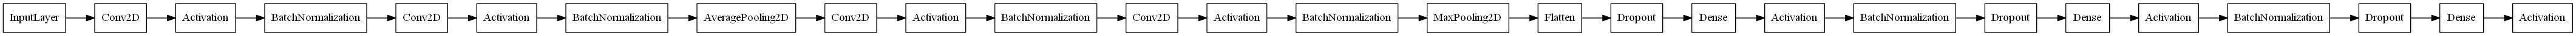

In [104]:
plot_model(mnist_model, to_file='mnist_blocks.png', show_shapes=False, rankdir='LR',show_layer_names=False)

<font size=4 color='black'> 
 [plot_model](https://keras.io/visualization/#training-history-visualization)

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 13

<font size=4>

¿Cuántos parámetros tiene el modelo de red neuronal que implementaste? 

Puedes responder a esta pregunta usando el atributo summary(). 

In [105]:
mnist_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
activation_37 (Activation)   (None, 26, 26, 28)        0         
_________________________________________________________________
batch_normalization_37 (Batc (None, 26, 26, 28)        112       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 9, 9, 15)          10515     
_________________________________________________________________
activation_38 (Activation)   (None, 9, 9, 15)          0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 9, 9, 15)          60        
_________________________________________________________________
average_pooling2d_7 (Average (None, 4, 4, 15)        

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 14

<font size=4>

Compila el modelo seleccionando un optimizador (con una tasa de aprendizaje seleccionable, es decir, no uses los valores por defecto), la función de costo (loss) y una metrica adecuadas para este problema.

Hint: en la clase 10 revisamos un problema similar, puedes consultar la función de costo y la métrica utilizada. 

In [106]:
learning_rate = 0.05

optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0, nesterov=False)

loss_function = 'categorical_crossentropy'
metric_function = 'accuracy'

In [107]:
mnist_model.compile(optimizer = optimizer, loss = loss_function, metrics = [metric_function])

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 15


<font size=4>

Entrena la red neuronal que implementaste, indica la cantidad de datos a usar para validar el modelo, el número de epocas a utilizar así como el tamaño del batch. No olvides usar shuffle=True.

In [109]:
validation_portion = 0.1
batch_size = 100
num_epochs = 10 #Solo 10 épocas porque tardaba mucho, pero aprendía rápido

history = mnist_model.fit(x=train_x, y=train_y, epochs=num_epochs, batch_size=batch_size, \
                            validation_split=validation_portion, shuffle=True, verbose=1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 544s 12ms/step - loss: 0.7097 - accuracy: 0.7734 - val_loss: 1.9015 - val_accuracy: 0.4118
Epoch 2/10
45000/45000 [==============================] - 538s 12ms/step - loss: 0.3198 - accuracy: 0.9019 - val_loss: 0.1716 - val_accuracy: 0.9442
Epoch 3/10
45000/45000 [==============================] - 539s 12ms/step - loss: 0.2445 - accuracy: 0.9258 - val_loss: 0.1501 - val_accuracy: 0.9514
Epoch 4/10
45000/45000 [==============================] - 540s 12ms/step - loss: 0.2058 - accuracy: 0.9381 - val_loss: 0.1342 - val_accuracy: 0.9568
Epoch 5/10
45000/45000 [==============================] - 543s 12ms/step - loss: 0.1807 - accuracy: 0.9444 - val_loss: 0.1315 - val_accuracy: 0.9626
Epoch 6/10
45000/45000 [==============================] - 594s 13ms/step - loss: 0.1699 - accuracy: 0.9488 - val_loss: 0.1092 - val_accuracy: 0.9654
Epoch 7/10
45000/45000 [==============================] -

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 16

<font size=4>

Grafica el costo en función de la epoca para los conjuntos de entrenamiento y de validación.

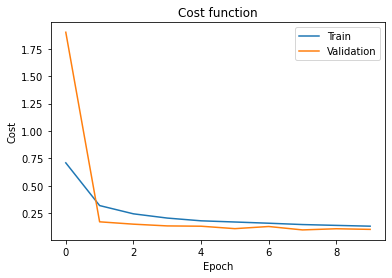

In [110]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Cost function')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


<font size = 4 color="blue">
Un buen fit

<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 17


<font size=4>

Grafica el accuracy (la precisión del modelo) en función de la epoca para los conjuntos de entrenamiento y de validación.

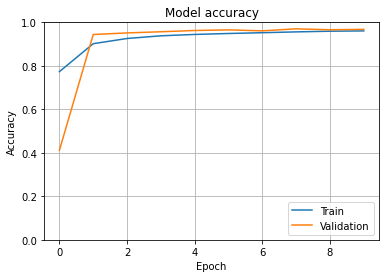

In [111]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid()
plt.ylim(0,1)
plt.show()


<font size=4 color='rosybrown'>
    
    
 #### Ejercicio 18

<font size=4>

Evalua el modelo en el conjunto de prueba. Usa el métodod evaluate()

In [112]:
evaluations = mnist_model.evaluate(x = test_x, y = test_y)

print ("Loss = " + str(evaluations[0]))
print ("Test Accuracy = " + str(evaluations[1]))

10000/10000 [==============================] - 52s 5ms/step
Loss = 0.08060407104715706
Test Accuracy = 0.9726999998092651


<font size = 5 color="cornflowerblue">

Parte III: **Inferencia**

<font size=4 color='rosybrown'>
    
    
#### Ejercicio 19

<font size=4>

Realiza predicciones sobre el conjunto de prueba. Usa el método predict()

Muestra algun ejemplo, es decir dado un input tomado del conjunto test_x muestra cuál es la inferencia realizada por la red neuronal y cual es la etiqueta real (la correspondiente test_y).

In [113]:
# Predicting the digits associated to each sample in the test set (test_x)
predictions = mnist_model.predict(test_x)

8 is the digit corresponding to the sample 1234
For the sample number 1234 the prediction is the digit: 8

 This is its image


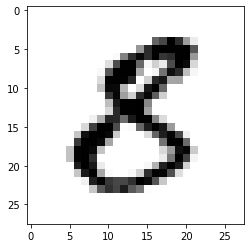

In [132]:
index = 1234

plt.imshow(test_x[index].reshape((28, 28)),cmap='binary')

print(np.argmax(test_y[index]), "is the digit corresponding to the sample", index)

prediction = np.argmax(predictions[index])

print('For the sample number', index, 'the prediction is the digit:', prediction)

print("\n This is its image")

2 is the digit corresponding to the sample 1345
For the sample number 1345 the prediction is the digit: 2

 This is its image


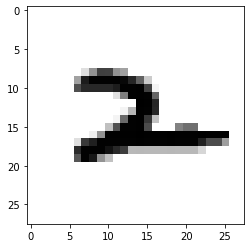

In [136]:
index = 1345

plt.imshow(test_x[index].reshape((28, 28)),cmap='binary')

print(np.argmax(test_y[index]), "is the digit corresponding to the sample", index)

prediction = np.argmax(predictions[index])

print('For the sample number', index, 'the prediction is the digit:', prediction)

print("\n This is its image")

1 is the digit corresponding to the sample 9876
For the sample number 9876 the prediction is the digit: 1

 This is its image


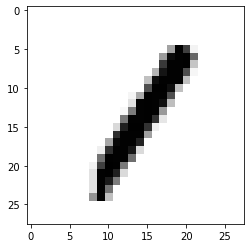

In [135]:
index = 9876

plt.imshow(test_x[index].reshape((28, 28)),cmap='binary')

print(np.argmax(test_y[index]), "is the digit corresponding to the sample", index)

prediction = np.argmax(predictions[index])

print('For the sample number', index, 'the prediction is the digit:', prediction)

print("\n This is its image")